# Venue Data

### This data looks at 5 separate sections of data collected on Venues, the variables collected are 

- Age
- Distance
- Gender
- Spend
- Daily Visitors

### Importing necessary Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

### Assigning the variables to their csv files

In [2]:
age = pd.read_csv('VenueAge.csv',)
distance = pd.read_csv('VenueDistance.csv')
dur = pd.read_csv('VenueDuration.csv')
gender = pd.read_csv('VenueGender.csv')
spend = pd.read_csv('VenueSpend.csv')
visitors = pd.read_csv('VenueDailyVisitors.csv')

In [55]:
visitors.head()

,XLA,YVW,XFP,XJT,CWN,VLS,WRL,WDZ,SJU,QJL,...,WXV,AEQ,QRY,YXF,XPE,BEY,UFY,TRV,AXM,ZPL
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,84,0,70,89,249,78,90,90,673,265,...,87,0,291,57,76,204,63,83,62,81
2019-01-02,97,0,70,72,240,58,84,78,653,244,...,93,0,243,97,73,200,68,65,77,68
2019-01-03,83,0,65,73,178,60,84,98,530,204,...,93,0,204,95,80,169,52,85,58,40
2019-01-04,72,0,62,65,154,69,69,89,277,170,...,104,0,174,73,71,133,77,59,51,50
2019-01-05,100,0,67,99,152,62,86,65,370,170,...,89,0,194,79,72,130,52,68,49,45


### Merging multiple datasets that use the same ID to create one larger DataFrame

In [3]:
df = pd.merge(age,distance)

In [4]:
df2 = pd.merge(dur,gender)

In [5]:
ADS = pd.merge(df,spend)

In [6]:
ADS.head(5)

,Id,Avg age (yrs),Max travel distance (mls),Avg spend (£)
0,XLA,52,13,19
1,YVW,30,2,15
2,XFP,34,11,20
3,XJT,39,7,29
4,CWN,32,12,12


In [7]:
#Final Datafram excluding daily visitors which can not be merged along
venue = pd.merge(ADS,df2)

## Checking Descriptions of the new Venue DF

In [8]:
venue.head(5)

,Id,Avg age (yrs),Max travel distance (mls),Avg spend (£),Avg visit duration (mins),Proportion Female (%)
0,XLA,52,13,19,93,56
1,YVW,30,2,15,77,50
2,XFP,34,11,20,83,54
3,XJT,39,7,29,81,48
4,CWN,32,12,12,84,43


In [9]:
venue.describe()

,Avg age (yrs),Max travel distance (mls),Avg spend (£),Avg visit duration (mins),Proportion Female (%)
count,40.000000,40.000000,40.000000,40.000000,40.000000
mean,40.250000,11.275000,23.825000,96.975000,49.375000
std,8.969321,9.652919,7.652342,20.247808,5.390816
min,26.000000,2.000000,10.000000,68.000000,41.000000
25%,32.000000,5.750000,18.750000,82.500000,45.750000
50%,41.500000,9.000000,23.500000,92.500000,48.500000
75%,48.000000,12.250000,30.000000,106.500000,53.250000
max,54.000000,47.000000,38.000000,148.000000,60.000000


In [10]:
venue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 0 to 39
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Id                         40 non-null     object
 1   Avg age (yrs)              40 non-null     int64 
 2   Max travel distance (mls)  40 non-null     int64 
 3   Avg spend (£)              40 non-null     int64 
 4   Avg visit duration (mins)  40 non-null     int64 
 5   Proportion Female (%)      40 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 2.2+ KB


In [11]:
venue.shape

(40, 6)

In [12]:
venue.nunique()

Id                           40
Avg age (yrs)                22
Max travel distance (mls)    17
Avg spend (£)                21
Avg visit duration (mins)    30
Proportion Female (%)        18
dtype: int64

## Checking for Null/Missing Values

In [13]:
venue.isnull().sum()

Id                           0
Avg age (yrs)                0
Max travel distance (mls)    0
Avg spend (£)                0
Avg visit duration (mins)    0
Proportion Female (%)        0
dtype: int64

## Trying to intergrate the DailyVisitors dataset in to my main Venue Dataframe

In [14]:
#Not to forget we still have this dataset
visitors.head()

,Date,XLA,YVW,XFP,XJT,CWN,VLS,WRL,WDZ,SJU,...,WXV,AEQ,QRY,YXF,XPE,BEY,UFY,TRV,AXM,ZPL
0,2019-01-01,84,0,70,89,249,78,90,90,673,...,87,0,291,57,76,204,63,83,62,81
1,2019-01-02,97,0,70,72,240,58,84,78,653,...,93,0,243,97,73,200,68,65,77,68
2,2019-01-03,83,0,65,73,178,60,84,98,530,...,93,0,204,95,80,169,52,85,58,40
3,2019-01-04,72,0,62,65,154,69,69,89,277,...,104,0,174,73,71,133,77,59,51,50
4,2019-01-05,100,0,67,99,152,62,86,65,370,...,89,0,194,79,72,130,52,68,49,45


In [15]:
visitors.shape

(365, 41)

In [16]:
#This gives us the average daily visitors for each Venue
visitors.mean()

XLA     84.323288
YVW     16.567123
XFP     68.367123
XJT     77.745205
CWN    201.635616
VLS     67.224658
WRL     80.597260
WDZ     85.506849
SJU    478.186301
QJL    224.136986
BQV     47.994521
ZJB     30.846575
WFI     84.156164
AWF    144.142466
PDT    243.476712
ZFX     94.054795
CQC    151.950685
UZO     75.328767
SPF    458.482192
ZLH     69.728767
PXI    394.742466
YRU     67.463014
RDA    516.205479
DKS    166.389041
BKI     26.139726
GLQ     57.550685
TLJ     82.200000
YDI     34.252055
XXO     45.468493
VRD     58.008219
WXV     95.243836
AEQ     13.054795
QRY    231.041096
YXF     75.487671
XPE     77.295890
BEY    173.263014
UFY     65.501370
TRV     73.884932
AXM     58.249315
ZPL     28.010959
dtype: float64

In [17]:
type(visitors.mean())

pandas.core.series.Series

### Creating a DF from visitors mean

In [18]:
avgvis = pd.DataFrame(visitors.mean())

In [19]:
avgvis.columns = ['Average Daily visitors']

In [20]:
avgvis.head(10)

,Average Daily visitors
XLA,84.323288
YVW,16.567123
XFP,68.367123
XJT,77.745205
CWN,201.635616
VLS,67.224658
WRL,80.597260
WDZ,85.506849
SJU,478.186301
QJL,224.136986


In [21]:
avgvis = avgvis.rename(columns = {0:"item"})

# Looking to create some visualisations

In [22]:
venue.head(3)

,Id,Avg age (yrs),Max travel distance (mls),Avg spend (£),Avg visit duration (mins),Proportion Female (%)
0,XLA,52,13,19,93,56
1,YVW,30,2,15,77,50
2,XFP,34,11,20,83,54


# Heatmap
## - Venue Correlation across all 

### Darker colours show the is a greater corelation between two variables, this allows us to get an insight in to what relationships will proabbaly bear the most fruit/usefull information

In [23]:
venue.corr()

,Avg age (yrs),Max travel distance (mls),Avg spend (£),Avg visit duration (mins),Proportion Female (%)
Avg age (yrs),1.000000,0.303039,0.776202,0.005824,0.249373
Max travel distance (mls),0.303039,1.000000,0.273506,0.135555,0.037880
Avg spend (£),0.776202,0.273506,1.000000,-0.129771,0.071868
Avg visit duration (mins),0.005824,0.135555,-0.129771,1.000000,0.524174
Proportion Female (%),0.249373,0.037880,0.071868,0.524174,1.000000


(5.0, 0.0)

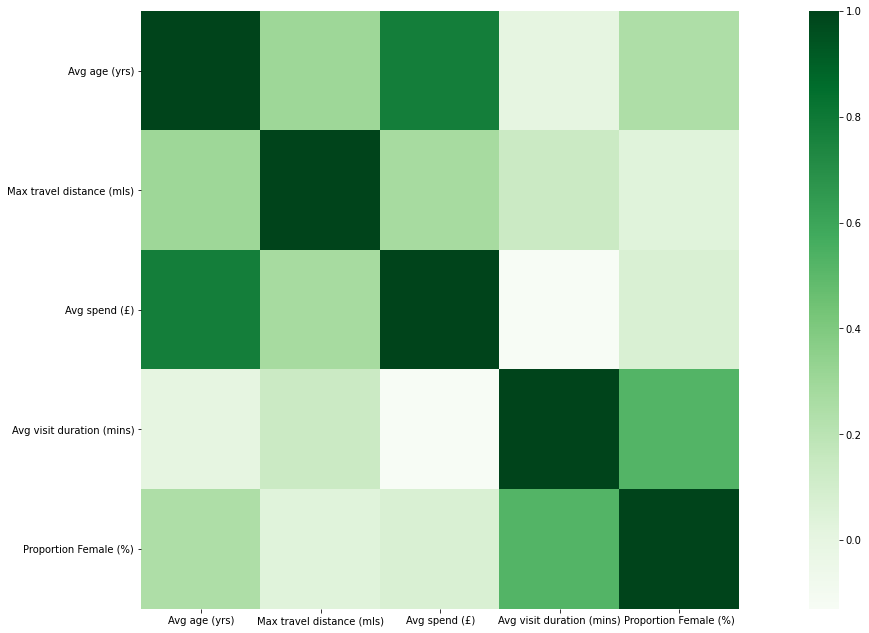

In [24]:
plt.figure(figsize=(25,11))
sns.set_palette("Paired")
ax = sns.heatmap(venue.corr(),vmax=1.0,square=True,annot_kws={'size':10},cmap="Greens")
#cmap changed colour
ax.get_ylim()
(5.5, 0.5)
ax.set_ylim(5.0, 0) 

# Barcharts to see most active Venues in separate metrics

In [25]:
venue.head()

,Id,Avg age (yrs),Max travel distance (mls),Avg spend (£),Avg visit duration (mins),Proportion Female (%)
0,XLA,52,13,19,93,56
1,YVW,30,2,15,77,50
2,XFP,34,11,20,83,54
3,XJT,39,7,29,81,48
4,CWN,32,12,12,84,43


## Venues : Highest average spend

C:\Users\Junayid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Id', ylabel='Avg spend (£)'>

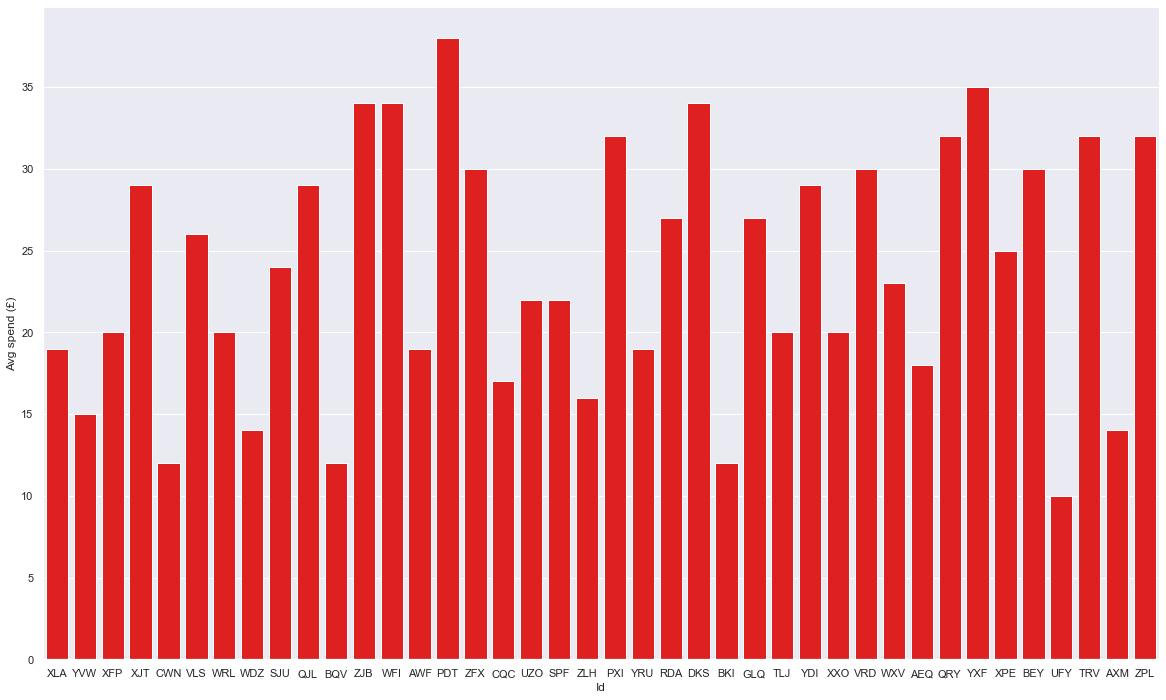

In [26]:
sns.set(rc={'figure.figsize':(20,12)})
clrs = ['red']
sns.barplot(venue["Id"],venue['Avg spend (£)'], palette = clrs)

## Venues : Highest average age

C:\Users\Junayid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Id', ylabel='Avg age (yrs)'>

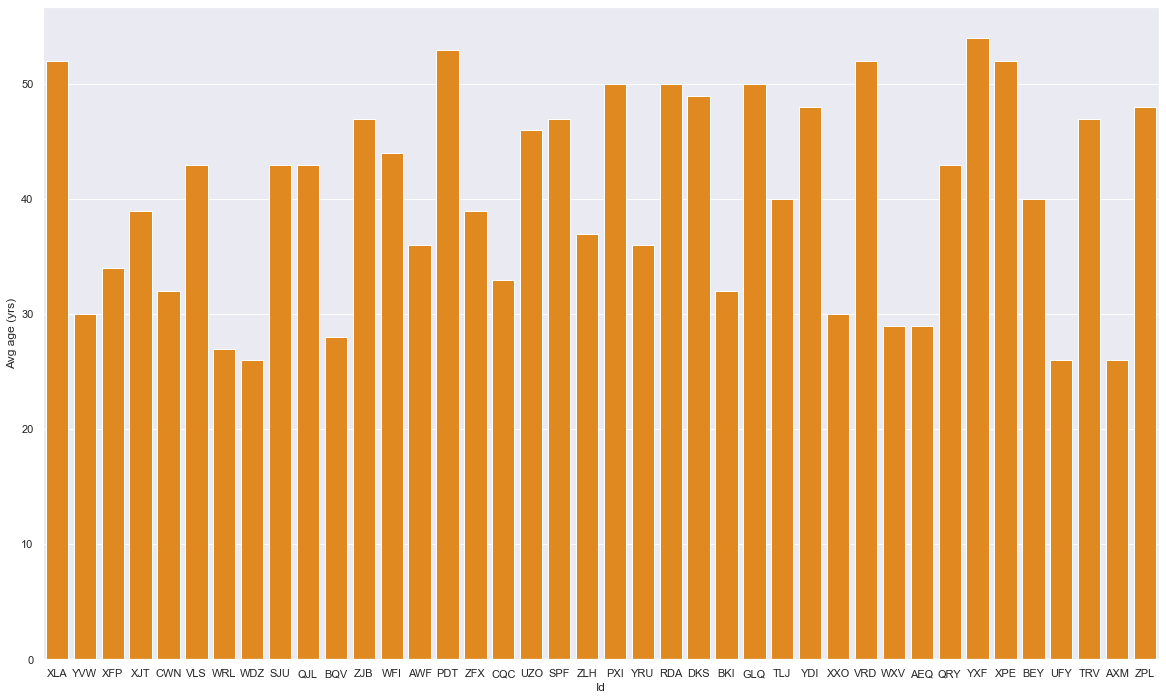

In [27]:
clrs = ['darkorange']
sns.barplot(venue["Id"],venue['Avg age (yrs)'],palette=clrs)

## Venues : Highest average duration

C:\Users\Junayid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Id', ylabel='Avg visit duration (mins)'>

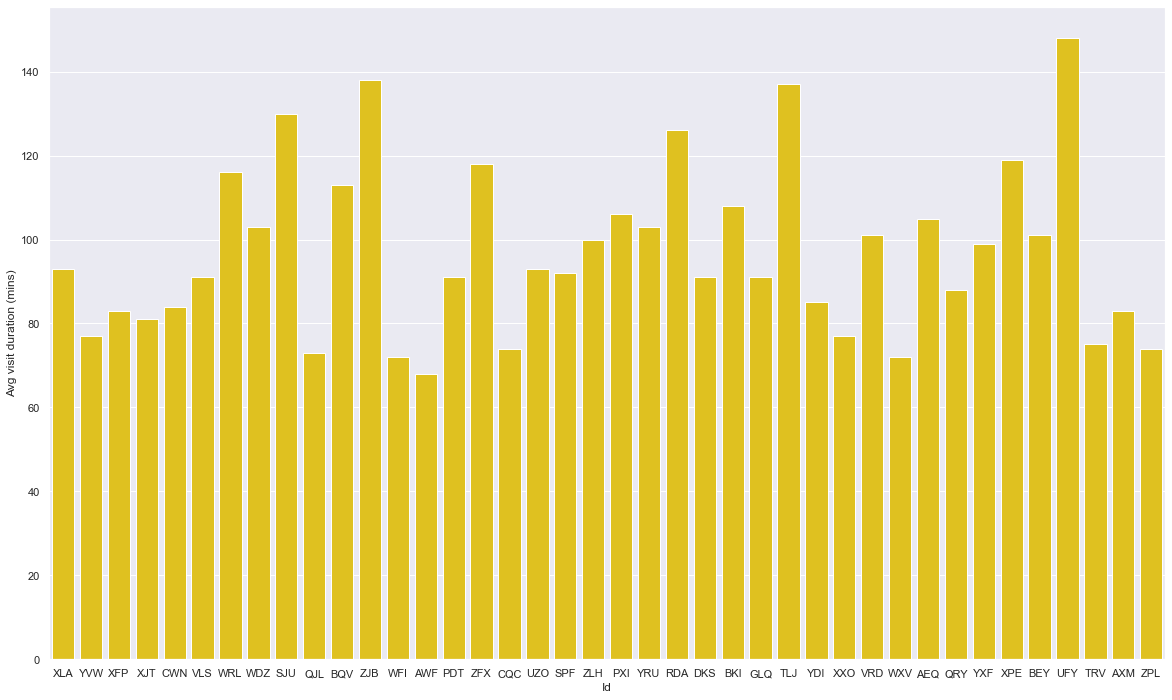

In [28]:
clrs = ['gold']
sns.barplot(venue["Id"],venue['Avg visit duration (mins)'],palette=clrs)

# Venues : Average daily visitors

In [29]:
#sns.barplot(avgvis["Id"],avgvis['Average Daily visitors'], palette = clrs)

In [30]:
avgvis.head()

,Average Daily visitors
XLA,84.323288
YVW,16.567123
XFP,68.367123
XJT,77.745205
CWN,201.635616


# Duration at Venue vs Average Spend

Text(12.085, 0.5, 'Average Spend')

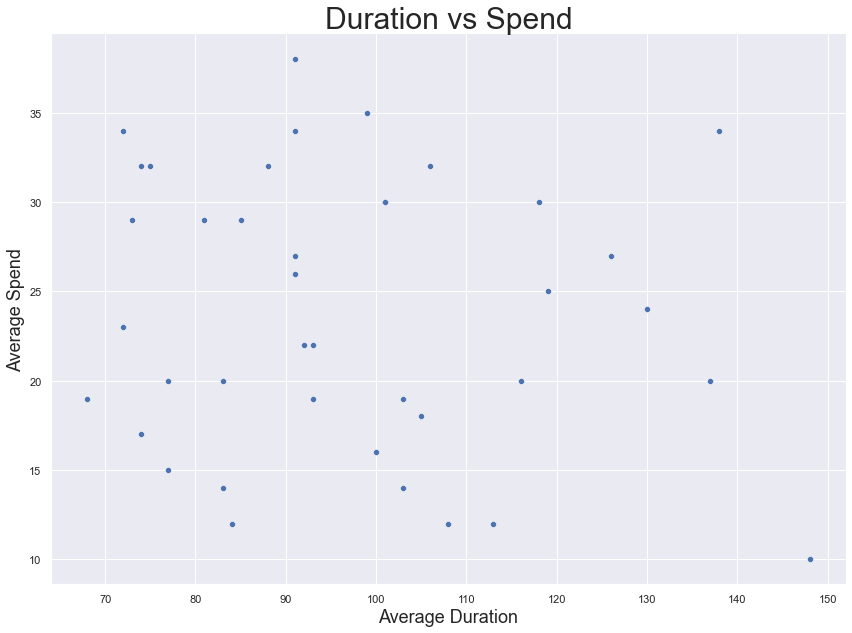

In [31]:

sns.set(rc={'figure.figsize':(20,12)})
sns.relplot(x="Avg visit duration (mins)", y="Avg spend (£)", data=venue, height=8.27, aspect=11.7/8.27, )
sns.color_palette("pastel")
plt.title('Duration vs Spend', fontsize =30)
plt.xlabel("Average Duration", fontsize=18)
plt.ylabel("Average Spend", fontsize = 18)


# Average Age vs Average Spend

Text(12.085, 0.5, 'Average Spend')

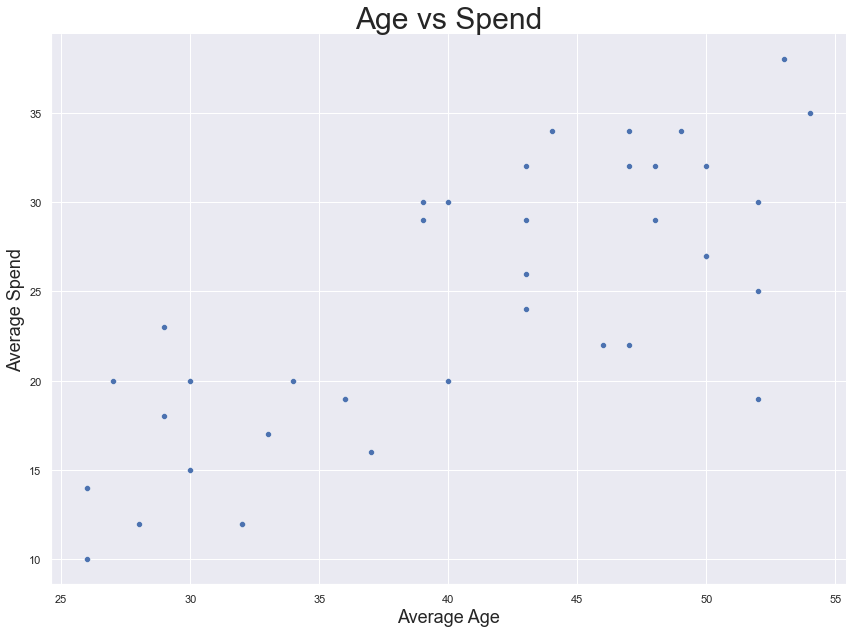

In [32]:
sns.set(rc={'figure.figsize':(20,12)})
sns.relplot(x="Avg age (yrs)", y="Avg spend (£)", data=venue, height=8.27, aspect=11.7/8.27)
sns.color_palette("Set2")
plt.title('Age vs Spend', fontsize =30)
plt.xlabel("Average Age", fontsize=18)
plt.ylabel("Average Spend", fontsize = 18)


### Plotting a line graph to further proove a positive correlation with some sporadic points

<AxesSubplot:xlabel='Avg age (yrs)', ylabel='Avg spend (£)'>

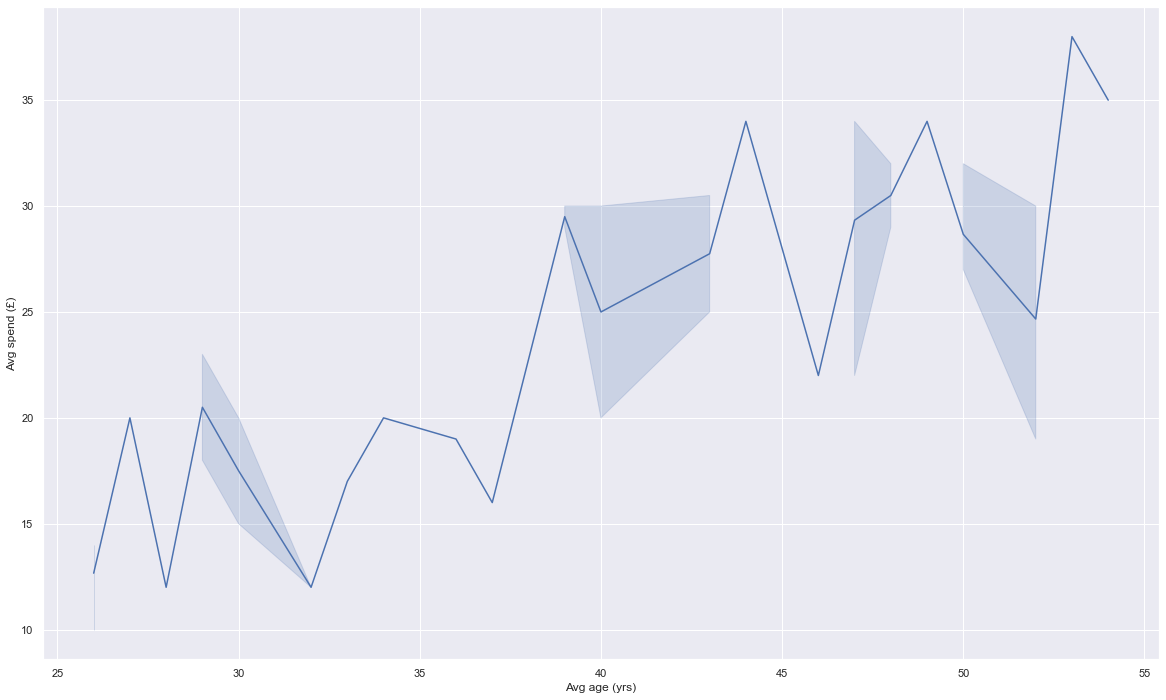

In [33]:
sns.lineplot(x="Avg age (yrs)", y="Avg spend (£)", data=venue,)

# Using a scatter plot with a Hue 

### Duration is also being plotted on this graph in the form of a coloured Hue, this would help us see if there is any additional correlation

Text(14.58121527777778, 0.5, 'Average Spend')

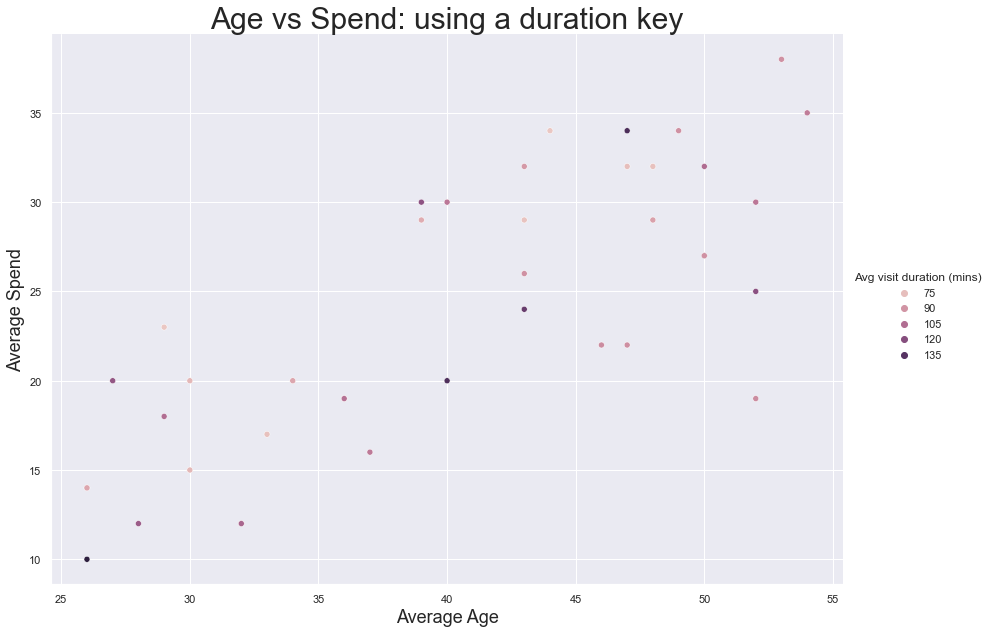

In [34]:

sns.set(rc={'figure.figsize':(20,12)})
sns.relplot(x="Avg age (yrs)", y="Avg spend (£)", hue = "Avg visit duration (mins)", data=venue,height=8.27, aspect=11.7/8.27)
sns.color_palette("Set2")
plt.title('Age vs Spend: using a duration key', fontsize =30)
plt.xlabel("Average Age", fontsize=18)
plt.ylabel("Average Spend", fontsize = 18)


# Bubble Plot

### This graph shows that the most visited venues , are seen to have more spending within them. While people are also more willing to travel a greater distance to visit them

In [35]:
# Calling CSV files without index column, and as seprate DF
spending = pd.read_csv("VenueSpend.csv",index_col=0)
visitors = pd.read_csv("VenueDailyVisitors.csv",index_col=0)
distance = pd.read_csv("VenueDistance.csv", index_col=0)


In [36]:
data = pd.DataFrame(round(visitors.mean()), columns = ['mean visitors'], index=distance.index)

In [37]:
data['Spending'] = spending.values

In [38]:
data['Distance'] = distance.values

In [39]:
data.corr()

,mean visitors,Spending,Distance
mean visitors,1.000000,0.211812,0.866206
Spending,0.211812,1.000000,0.273506
Distance,0.866206,0.273506,1.000000


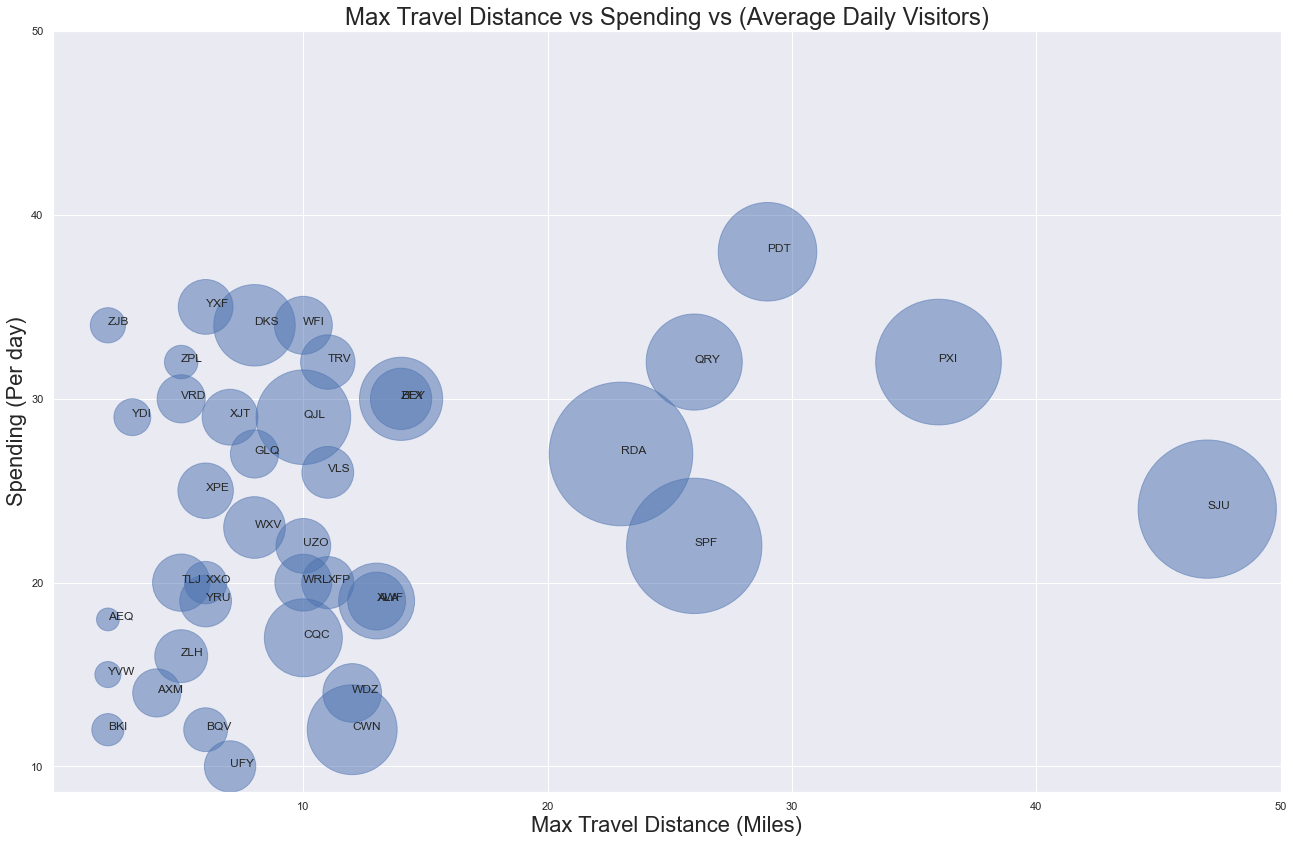

In [54]:
data['Bubblesize'] = data['mean visitors'] * 40


plt.figure(figsize=(22, 14))
plt.scatter(data['Distance'],data['Spending'],
           s=data['Bubblesize'],alpha=0.5)
plt.xticks([10, 20, 30, 40, 50])
plt.yticks([10, 20, 30, 40, 50])
plt.title('Max Travel Distance vs Spending vs (Average Daily Visitors)', fontsize=24)
plt.xlabel('Max Travel Distance (Miles)', fontsize=22)
plt.ylabel('Spending (Per day)', fontsize=22)

# For loop to put the names of the Venues(ID) on to the bubbles
for i, name in enumerate(data.index): 
    plt.annotate(name,(data['Distance'][i], data['Spending'][i]))

